# Betting Strategy Using the Kelly Criterion

In this notebook, we will explore how to determine the optimal bet size to maximize long-term growth when betting on a random outcome. 




# Question 1
You are betting on a random outcome, where the outcome is uniformly distributed between 0 and 100. You can either win or lose based on the value of the outcome. If the outcome is above 50, you win 2x your bet, and if it’s below 50, you lose your bet. How much should you bet from your $1,000 bankroll to maximize your expected long-term growth?

## Problem Statement

You are betting on a random outcome, where the outcome is uniformly distributed between 0 and 100. You can either win or lose based on the value of the outcome:
- If the outcome is above 50, you win 2x your bet.
- If the outcome is below 50, you lose your bet.

How much should you bet from your $1,000 bankroll to maximize your expected long-term growth?



In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
# Define the parameters
b = 2  # Net odds received on the bet
p = 0.5  # Probability of winning
q = 1 - p  # Probability of losing


# Number of iterations
n = 10

In [107]:
# Choose a fraction of the bankroll to bet
betting_fraction = 0.1  # Bet 10% of the bankroll

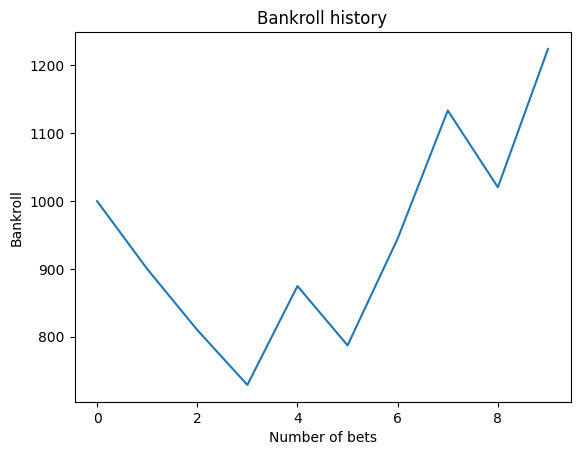

In [116]:
# simulate betting
bankroll = 1000  # Initial bankroll
bankroll_history = [bankroll]

for i in range(1, n):
    outcome = np.random.rand()
    # Bet a fraction of the bankroll
    bet = betting_fraction * bankroll
    # Win the bet
    bankroll += b * bet if outcome < p else -bet
    # Print the bankroll
    # print('Bankroll after bet {0}: {1}'.format(i, bankroll))
    bankroll_history.append(bankroll)

# Plot the bankroll history
plt.plot(bankroll_history)
plt.xlabel('Number of bets')
plt.ylabel('Bankroll')
plt.title('Bankroll history')
plt.show()

## Solution Using the Kelly Criterion

The Kelly Criterion is a formula used to determine the optimal size of a series of bets to maximize the logarithm of wealth. The formula is given by:

\[ f^* = \frac{bp - q}{b} \]

where:
- \( f^* \) is the fraction of the bankroll to bet.
- \( b \) is the net odds received on the bet (i.e., the multiple of the bet you win).
- \( p \) is the probability of winning.
- \( q \) is the probability of losing (i.e., \( 1 - p \)).

In our case:
- \( b = 2 \) (since you win 2x your bet).
- \( p = 0.5 \) (since the outcome is uniformly distributed between 0 and 100, the probability of the outcome being above 50 is 0.5).
- \( q = 1 - p = 0.5 \).

Let's calculate the optimal bet size using the Kelly Criterion.

In [4]:
# Calculate the optimal fraction to bet
def kelly_criterion(b, p):
    q = 1 - p
    f_star = (b * p - q) / b
    return f_star

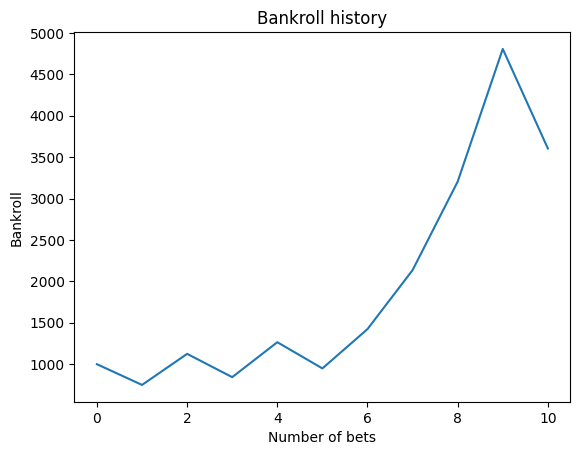

In [130]:
f_star = kelly_criterion(b, p)
bankroll = 1000  # Initial bankroll

# simulate betting
bankroll_history = [bankroll]
for _ in range(n):
    # calculate Kelly fraction
    f_star = kelly_criterion(b, p)
    # Bet a fraction of the bankroll
    bet = f_star * bankroll
    # Win the bet
    if np.random.random() < p:
        bankroll += b * bet
    else:
        bankroll -= bet
    bankroll_history.append(bankroll)

# Plot the bankroll history
plt.plot(bankroll_history)
plt.xlabel('Number of bets')
plt.ylabel('Bankroll')
plt.title('Bankroll history')
plt.show()